In [3]:
# imports, setup
from scipy import integrate
import numpy as N
import pylab as p
import matplotlib
%matplotlib inline

In [139]:
# define func to be integrated; \int\int dr du
def fun(u,r,*args):
    tau = args[0]
    return 1. - N.exp(-tau*N.sqrt((1. - r**2)/(1. - u**2)))

# define filament function
def filament(tau):
    exp_av = integrate.nquad(fun, [[0.,1],[0.,1]],args=(tau,))[0]
    return exp_av

def sphere(x,y):
    b = N.sqrt(x**2+y**2)
    if b>1.:
        return 0
    else:
        return N.sqrt(1.-b**2)
    
def circle(b):
    return N.sqrt(1.-b**2)

def l(r,*args):
    R = args[0]
    sel = (r<=R)
    res = N.zeros(r.size)
    res[sel] = 2*N.sqrt(R**2-r[sel]**2)
    return res, sel
    
def lp(r,phi,*args):
    R = args[0]
    return 2*N.sqrt(R**2-r**2)

In [137]:
R = 4.
x = N.random.uniform(-R,R,size=10000000)
y = N.random.uniform(-R,R,size=10000000)
r = N.sqrt(x**2+y**2)
print r[:10]
ls, sel = l(r,R)

[ 2.73757109  3.58567338  3.8374774   3.41141804  2.49481048  3.43111346
  2.99735528  3.65145254  3.8836403   3.61828818]


In [138]:
ls[sel].min(), ls[sel].max(), ls[sel].mean(), ls[sel].mean()/(2*R)

(0.0026299060753731999,
 7.9999997142413966,
 5.3335588499209052,
 0.66669485624011315)

In [145]:
R=1; integrate.nquad(lp,[[-R,R],[0,2*N.pi]],args=(R,))[0]/R/(2*N.pi)/(2.*R)

1.5707963267948983

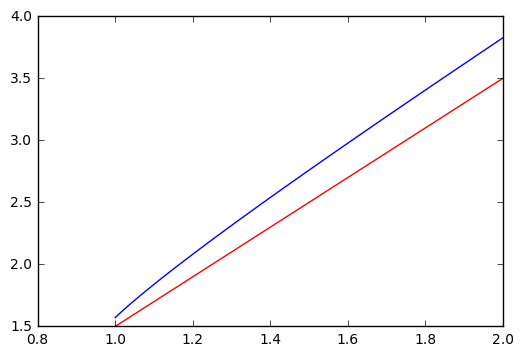

In [72]:
ra,rb = 1,2
R = N.linspace(ra,rb,100)
lengths = N.array([integrate.nquad(l,[[0,1]],args=(_,))[0] for _ in R])
p.plot(R,lengths,'b-')
p.plot([ra,rb],2.*N.array([ra,rb])-0.5,'r-')

In [13]:
res/N.pi/2. #/2./N.pi #/N.pi

1.5707963267948961

In [47]:
integrate.nquad(circle,[[0,1]])[0]

0.7853981633974481

In [48]:
integrate.nquad(sphere,[[0,1],[0,1]])

(0.5235987763835493, 1.4531484571200792e-08)

In [3]:
# log-equidistant sequence of taus
tau = N.logspace(-3,3,100)

# compute tau_av, exp_ev, K
tau_av = tau*N.pi**2/8
exp_av = N.array([filament(_) for _ in tau])
K = exp_av/tau_av    

In [4]:
# save arrays to data file
header = 'tau       tau_av      exp_av      K'
N.savetxt('filament.dat',N.vstack((tau,tau_av,exp_av,K)).T,fmt='%.5e',header=header)

In [5]:
# load columns from data file
tau, tau_av, exp_av, K = N.loadtxt('filament.dat',unpack=True)

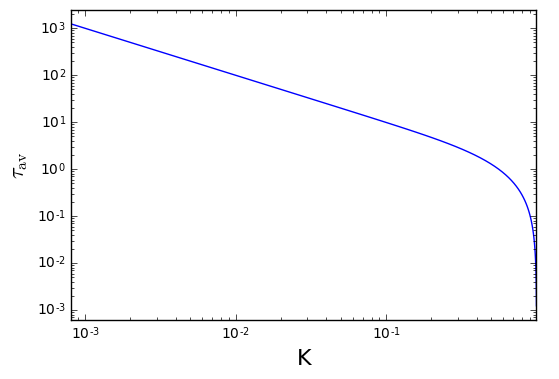

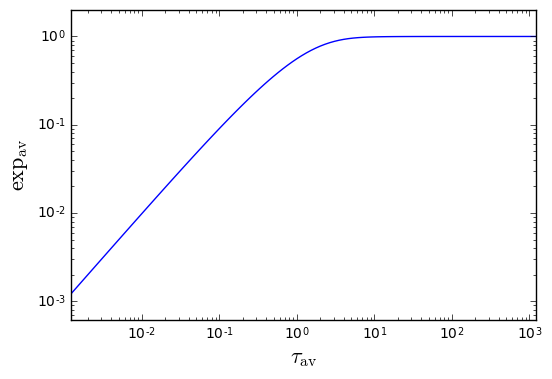

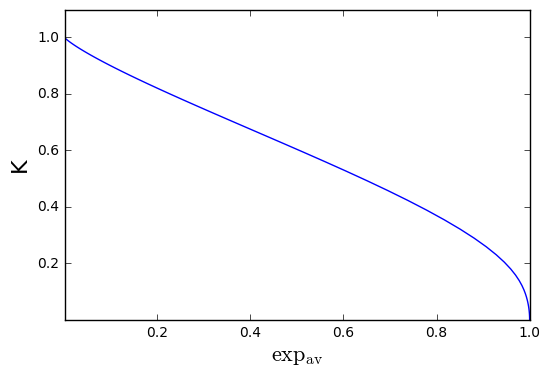

In [6]:
# a small plot function
def myplot(x,y,xlabel,ylabel,mode='log'):
    fig = p.figure()
    if mode == 'log':
        p.loglog(x,y,'b-')
        p.ylim(0.5*y.min(),2*y.max())
    else:
        p.plot(x,y,'b-')
        p.ylim(0.9*y.min(),1.1*y.max())
    p.xlim(x.min(),x.max())
    p.xlabel(xlabel,fontsize=16)
    p.ylabel(ylabel,fontsize=16)    

# plots
myplot(K,tau_av,'K',r'$\tau_{\rm av}$')
myplot(tau_av,exp_av,r'$\tau_{\rm av}$',r'$\exp_{\rm av}$')
myplot(exp_av,K,r'$\exp_{\rm av}$','K',mode='lin')